https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

Sigmoid

In [46]:


import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

sigmoid(-99)

1.0112214926104486e-43

In [16]:
from sklearn.datasets import load_digits
digits= load_digits() # 8x8 = 64 pixels  -- Very clean Dataset 

#### Now that you have the dataset loaded you can use the commands below

In [17]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [18]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [45]:
image=digits.data[4]

[[ 0.  0.  0.  1. 11.  0.  0.  0.]
 [ 0.  0.  0.  7.  8.  0.  0.  0.]
 [ 0.  0.  1. 13.  6.  2.  2.  0.]
 [ 0.  0.  7. 15.  0.  9.  8.  0.]
 [ 0.  5. 16. 10.  0. 16.  6.  0.]
 [ 0.  4. 15. 16. 13. 16.  1.  0.]
 [ 0.  0.  0.  3. 15. 10.  0.  0.]
 [ 0.  0.  0.  2. 16.  4.  0.  0.]]


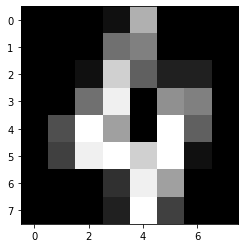

In [47]:
k = np.reshape(image, (8,8))
print(k)
plt.imshow(k, cmap=plt.cm.gray)

In [21]:
lista = [2, 6, "c", 9]
for i, x in enumerate(lista):
    print("####")
    print(i)
    print(x)

####
0
2
####
1
6
####
2
c
####
3
9


In [22]:
digits.target[0:50]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0])

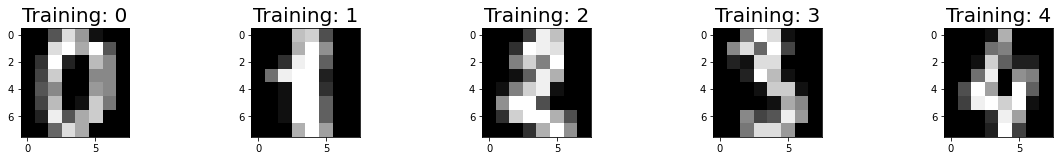

In [49]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1, 9, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    #plt.title('Training: %i\n' % label, fontsize = 20)
    plt.title('Training: ' + str(label), fontsize = 20)

### Splitting Data into Training and Test Sets (Digits Dataset)

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)  #partimos la data

In [25]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression() #Almaceno en una variable la regresion logística
logisticRegr.fit(x_train, y_train) #Entrenamos el modelo con conjunto entrenamiento

LogisticRegression()

In [26]:
print(y_train[:5])

[2 8 9 7 2]


### To predict

In [27]:
x_test.shape

(450, 64)

In [28]:
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(x_test[0:5], y_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)

AttributeError: module 'matplotlib' has no attribute 'figure'

In [29]:
plt.rcParams['figure.figsize'] = , 2
first_test_image = x_test[1]
plt.imshow(np.reshape(first_test_image, (8,8)), cmap=plt.cm.gray)

SyntaxError: invalid syntax (<ipython-input-29-aa1c5064c507>, line 1)

In [30]:
x_test[0].shape

(64,)

In [31]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[1].reshape(1, -1))

array([8])

In [32]:
x_test.shape

(450, 64)

In [33]:
y_test[0:10]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [34]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

### Probabilities

In [35]:
logisticRegr.predict(x_test[0:1])

array([2])

In [36]:
y_test[0:1]

array([2])

In [37]:
logisticRegr.predict_proba(x_test[0:1])

array([[2.69357336e-14, 2.07481677e-12, 9.99999999e-01, 3.73357902e-11,
        9.99877391e-17, 3.74504867e-11, 1.41934550e-18, 5.82655048e-10,
        4.92191078e-12, 3.33615787e-15]])

In [38]:
logisticRegr.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
max(logisticRegr.predict_proba(x_test[0:1])[0])

0.9999999993355317

### Measuring Model Performance (Digits Dataset)

In [40]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score * 100, "%")

95.11111111111111 %


### Matriz de confusión

Eje horizontal: falso positivo

Eje vertical: falso negativo

In [41]:
import sklearn.metrics as metrics
predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


In [42]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

TypeError: 'module' object is not callable